# Task 1: Introduction

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [15]:
def generate_examples(num=1000):
    W = [1.0, -3.0]
    b = 1.0
    W = np.reshape(W, (2,1))
    X = np.random.randn(num,2)
    y = b + np.dot(X,W) + np.random.randn()
    y = np.reshape(y,(num,1))
    return X, y

In [16]:
X, y = generate_examples()

In [17]:
print(X.shape,y.shape)

(1000, 2) (1000, 1)


In [18]:
print(X[0],y[0])

[0.49416404 2.13239276] [-5.32344832]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [19]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [20]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.53771516]
 [-0.88692407]]
2.8553702515843273


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [24]:
class Model(Model):
    def forward_pass(self,X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [26]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [-0.98254119]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [27]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [33]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [34]:
loss

2.1654826573412

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [35]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
        return dW, db

In [37]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)
dW, db = model.backward_pass(X, y, y_hat)

In [38]:
print(dW, db)

[-1.84431506  1.75431298] -1.9748978653751459


# Task 7: Update Parameters

In [46]:
class Model(Model):
    def update_parameters(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW,(self.num_features,1))
        self.b = self.b - db

# Task 8: Training Loop

In [47]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_parameters(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter {}, Loss {:.4f}'.format(i, loss))
        return losses

In [48]:
model = Model(2)

In [49]:
x_train, y_train = generate_examples()

In [50]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter 1, Loss 3.3518
Iter 2, Loss 3.3321
Iter 3, Loss 3.3125
Iter 4, Loss 3.2931
Iter 5, Loss 3.2737
Iter 6, Loss 3.2545
Iter 7, Loss 3.2354
Iter 8, Loss 3.2164
Iter 9, Loss 3.1975
Iter 10, Loss 3.1787
Iter 11, Loss 3.1600
Iter 12, Loss 3.1415
Iter 13, Loss 3.1230
Iter 14, Loss 3.1047
Iter 15, Loss 3.0864
Iter 16, Loss 3.0683
Iter 17, Loss 3.0503
Iter 18, Loss 3.0324
Iter 19, Loss 3.0145
Iter 20, Loss 2.9968
Iter 21, Loss 2.9792
Iter 22, Loss 2.9617
Iter 23, Loss 2.9443
Iter 24, Loss 2.9270
Iter 25, Loss 2.9098
Iter 26, Loss 2.8928
Iter 27, Loss 2.8758
Iter 28, Loss 2.8589
Iter 29, Loss 2.8421
Iter 30, Loss 2.8254
Iter 31, Loss 2.8088
Iter 32, Loss 2.7923
Iter 33, Loss 2.7759
Iter 34, Loss 2.7596
Iter 35, Loss 2.7434
Iter 36, Loss 2.7273
Iter 37, Loss 2.7112
Iter 38, Loss 2.6953
Iter 39, Loss 2.6795
Iter 40, Loss 2.6637
Iter 41, Loss 2.6481
Iter 42, Loss 2.6325
Iter 43, Loss 2.6171
Iter 44, Loss 2.6017
Iter 45, Loss 2.5864
Iter 46, Loss 2.5712
Iter 47, Loss 2.5561
Iter 48, Loss 2.5411
I

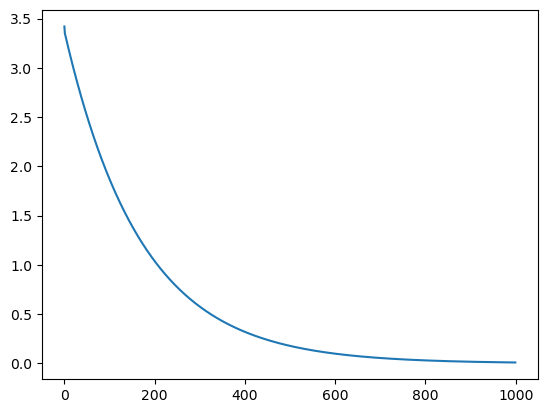

In [51]:
plt.plot(losses);

# Task 9: Predictions

In [80]:
model_untrained = Model(2)
x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [81]:
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

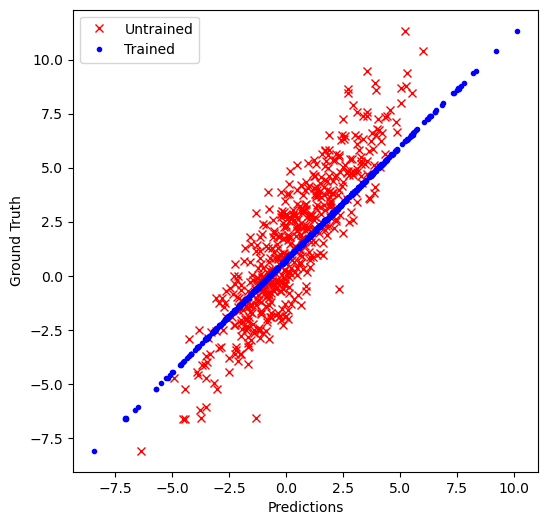

In [82]:
plt.figure(figsize = (6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()